In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Whitening data

In [3]:
data = torch.load("assign0_data.py")

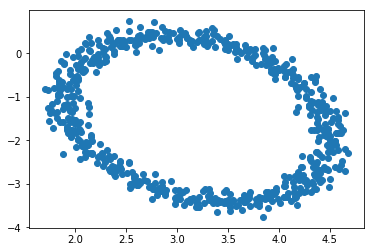

In [4]:
plt.scatter(data[:,0], data[:,1])

In [1]:
def whitening(data):
    tensor = data.numpy()
    
    tensor -= np.mean(tensor, axis = 0)
    cov = np.dot(tensor.T, tensor) / tensor.shape[0]
    
    #singular vector decomposition
    U,S,V = np.linalg.svd(cov)
    
    #plt.title("centered")
    #plt.scatter(tensor[:,0], tensor[:,1])
    
    Xrot = np.dot(tensor, U)
    Xwhite = Xrot / np.sqrt(S + 1e-5)
    plt.title("whitened")
    plt.scatter(Xwhite[:,0], Xwhite[:,1])

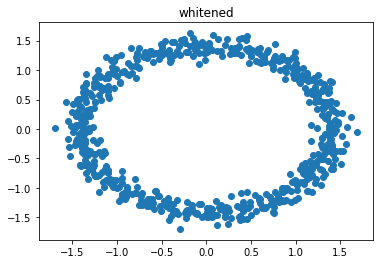

In [5]:
whitening(data)

The original distribution on graph is oval shape, assuming that the pricipal axis (eigenvector) would go through from left top to right bottom. In other words, X and Y have dependencies. However, after whitening, or going through singular vector decomposition and decorrelation, I could observe that the processed data is not correlated, creating circle like distribution which shows same variance in every direction.

## Fitting a 1D function with a simple neural net

In [6]:
in_array = np.linspace(-(np.pi), np.pi, 629)

In [7]:
out_array = np.cos(in_array) 

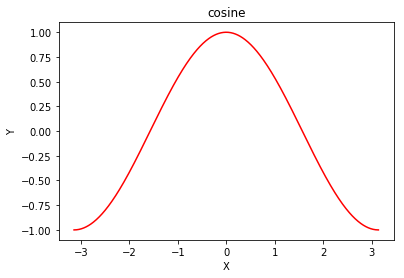

In [8]:
plt.plot(in_array, out_array, color = 'red') 
plt.title("cosine") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()

In [9]:
in_tensor = torch.tensor(in_array)
out_tensor = torch.tensor(out_array)

In [10]:
x = in_tensor.view(629,1)
y_truth = out_tensor.view(629,1)

In [11]:
x.shape, y_truth.shape

(torch.Size([629, 1]), torch.Size([629, 1]))

In [12]:
N, D_in, H, D_out = 629, 1, 10, 1

In [13]:
y = torch.randn(N, D_out)

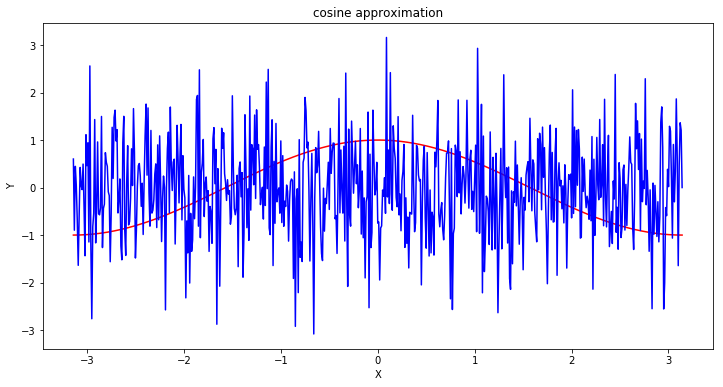

In [14]:
plt.figure(figsize=(12,6))
plt.plot(x, y_truth, color = 'red') 
plt.plot(x, y, color = 'blue')
plt.title("cosine approximation") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()

In [15]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),)

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
learning_rate = 1e-4

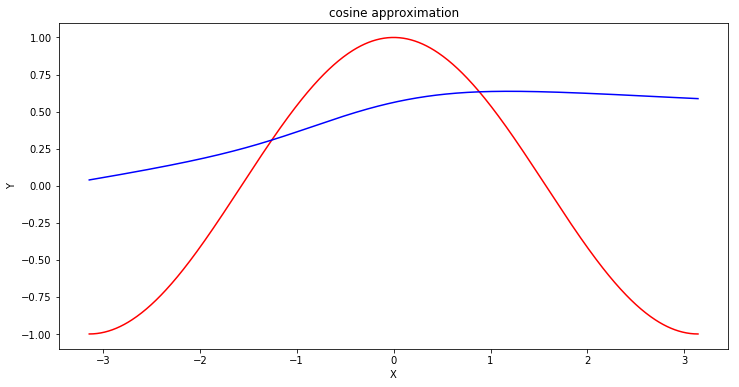

0 395.5035705566406
10 186.04437255859375
20 119.29515838623047
30 74.3957748413086
40 45.68778991699219
50 28.1688175201416
60 17.842344284057617
70 11.866034507751465
80 8.401023864746094
90 6.340694904327393
100 5.053886890411377
110 4.1941680908203125
120 3.576127052307129
130 3.1017441749572754
140 2.7190377712249756
150 2.3998003005981445
160 2.1279752254486084
170 1.893717885017395
180 1.6904380321502686
190 1.5133172273635864
200 1.3585846424102783
210 1.223152995109558
220 1.1044237613677979
230 1.0001803636550903
240 0.9085206985473633
250 0.8278043866157532
260 0.756614089012146
270 0.6937321424484253
280 0.638100266456604
290 0.58880615234375
300 0.5450612306594849
310 0.5061784386634827
320 0.4715662896633148
330 0.4407079815864563
340 0.41315653920173645
350 0.3885207772254944
360 0.36646029353141785
370 0.3466772735118866
380 0.32891109585762024
390 0.31293347477912903
400 0.2985440194606781
410 0.28556597232818604
420 0.2738446295261383
430 0.26324325799942017
440 0.253

In [19]:
for t in range(2000):
    y_pred = model(x.float())
    if t == 0:
        plt.figure(figsize=(12,6))
        plt.plot(x, y_truth, color = 'red') 
        plt.plot(x, y_pred.detach().numpy(), color = 'blue')
        plt.title("cosine approximation") 
        plt.xlabel("X") 
        plt.ylabel("Y") 
        plt.show()
    loss = loss_fn(y_pred, y_truth.float())
    if t % 10 == 0:
        print(t, loss.item())
    
    model.zero_grad()
    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


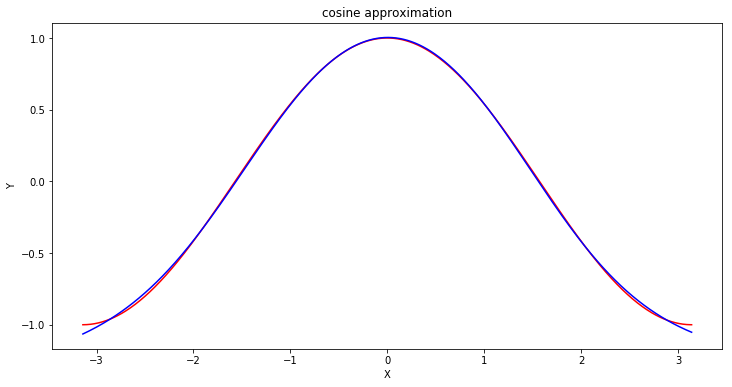

In [20]:
plt.figure(figsize=(12,6))
plt.plot(x, y_truth, color = 'red') 
plt.plot(x, y_pred.detach().numpy(), color = 'blue')
plt.title("cosine approximation") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()

## Environment information

In [20]:
print(torch.__version__)

1.2.0


In [21]:
from platform import python_version
print(python_version())

3.7.3
